In [ ]:
api_token = {"username":"tallapellisaicharan","key":"141ea6277b1d71d573d047c8947d19b5"}

In [ ]:
import json
import zipfile
import os
from google.colab import drive

In [ ]:
# Mouting the google drive
drive.mount('/content/drive')

Mounted at /content/drive


<b> Downloading dataset </b></br>
<b> Only needs to be done once </b>

In [ ]:
project_path = '/content/drive/My Drive/'
os.chdir(project_path)

citation for below code:https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

In [ ]:
directory = '/content/drive/My Drive/kaggle'
file_name = 'kaggle.json'
if not os.path.exists(directory):
    os.makedirs(directory)
file_path = os.path.join(directory, file_name)

with open(file_path, 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/drive/My Drive/kaggle/kaggle.json


chmod: cannot access '/content/drive/My': No such file or directory
chmod: cannot access 'Drive/kaggle/kaggle.json': No such file or directory


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions

facial-emotion-expressions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip facial-emotion-expressions.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

<b> Downloading and extraction completed </b>

In [ ]:
project_path = '/content/drive/My Drive/kaggle/facial-expression'
os.chdir(project_path)

FileNotFoundError: ignored

In [ ]:
!ls images

images	train  validation


citation for below code:https://www.tutorialspoint.com/pytorch/pytorch_convolutional_neural_network.htm

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    # This implementation of CNN does not use batch normalization
    def __init__(self, conv_shape, layers):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, layers[0], conv_shape)
        self.conv2 = nn.Conv2d(layers[0], layers[1], conv_shape)
        # Calculating the size of the input for the fc1 layer
        input_size = self.fc_input_size(conv_shape, layers)
        self.fc1 = nn.Linear(input_size, layers[2])
        self.fc2 = nn.Linear(layers[2], 10)  # setting 10 classes for the output 

    def fc_input_size(self, conv_shape, layers):
        # Our images are 48x48
        input_size = 48
        # Applying first convolutional layer and pooling operation
        input_size = (input_size - (conv_shape[0] - 1)) // 2
        # Applying second convolutional layer and pooling operation
        input_size = (input_size - (conv_shape[0] - 1)) // 2
        # Multiplying number of output channels in the second convolutional layer
        input_size *= input_size * layers[1]
        return input_size

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(-1, self.num_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_features(self, x):
        size = x.size()[1:]  # All dimensions but the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

def create_network(layers, conv_shape):
    net = CNN(conv_shape, layers)
    return net


In [ ]:
import time
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

def train_network(net, dataloaders, num_epochs):
    # Choosing the processing unit for processing
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net.to(device)
    criterion = CrossEntropyLoss()
    optimizer = Adam(net.parameters())
    start_time = time.time()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(dataloaders['train'], 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")
    end_time = time.time()
    training_time = end_time - start_time
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloaders['test']:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Overall Accuracy: {accuracy}%")
    return {'accuracy': accuracy, 'training_time': training_time}


In [ ]:
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:

train_dir = 'images/train'
test_dir = 'images/validation'
# Preprocessing
data_transforms = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
dataloaders = {'train': train_loader, 'test': test_loader}

In [ ]:
# Experiments without batch normalization
experiments = [{"layers": [16, 100, 2], "conv_shape": (3, 3), "label": "16 conv, 100x2"}]
results = []
for experiment in experiments:
    net = create_network(experiment["layers"], experiment["conv_shape"])
    result = train_network(net, dataloaders, num_epochs=10)
    results.append({"loss": result['accuracy'], "time": result['training_time'], "label": experiment["label"]})


Epoch 1, Loss: 2.2673674660617125
Epoch 2, Loss: 2.0963452798035616
Epoch 3, Loss: 1.9909495585773578
Epoch 4, Loss: 1.9265970015472953
Epoch 5, Loss: 1.8888956300435205
Epoch 6, Loss: 1.8669571757580912
Epoch 7, Loss: 1.852973621594668
Epoch 8, Loss: 1.8437999938914094
Epoch 9, Loss: 1.8370504844479445
Epoch 10, Loss: 1.8318235874176025
Overall Accuracy: 25.82790829323521%


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self, conv_shape, layers):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, layers[0], conv_shape)
        self.bn1 = nn.BatchNorm2d(layers[0])
        self.conv2 = nn.Conv2d(layers[0], layers[1], conv_shape)
        self.bn2 = nn.BatchNorm2d(layers[1])
        self.conv3 = nn.Conv2d(layers[1], layers[2], conv_shape)
        self.bn3 = nn.BatchNorm2d(layers[2])
        self.fc_input_size = self.fc_input_size(conv_shape, layers)
        self.fc1 = nn.Linear(self.fc_input_size, layers[3])
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(layers[3], 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), (2, 2))
        x = F.max_pool2d(F.relu(self.bn2(self.conv2(x))), (2, 2))
        x = F.relu(self.bn3(self.conv3(x)))
        x = x.view(-1, self.fc_input_size)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

    def fc_input_size(self, conv_shape, layers):
        input_size = 48
        input_size = (input_size - (conv_shape[0] - 1)) // 2
        input_size = (input_size - (conv_shape[0] - 1)) // 2
        input_size = input_size - (conv_shape[0] - 1)
        input_size *= input_size * layers[2]
        return input_size

# Update the create_network function to use the ImprovedCNN class
def create_network(layers, conv_shape):
    net = ImprovedCNN(conv_shape, layers)
    return net


In [ ]:
experiments = [
    {"layers": [32, 64, 128, 512], "conv_shape": (3, 3), "label": "32-64-128-512, 3x3 conv"},
    {"layers": [32, 64, 256, 512], "conv_shape": (3, 3), "label": "32-64-256-512, 3x3 conv"},
    {"layers": [32, 128, 256, 512], "conv_shape": (3, 3), "label": "32-128-256-512, 3x3 conv"},
    {"layers": [32, 64, 128, 256], "conv_shape": (5, 5), "label": "32-64-128-256, 5x5 conv"},
    {"layers": [32, 64, 128, 512], "conv_shape": (5, 5), "label": "32-64-128-512, 5x5 conv"},
    {"layers": [32, 64, 256, 512], "conv_shape": (5, 5), "label": "32-64-256-512, 5x5 conv"},
    {"layers": [32, 128, 256, 512], "conv_shape": (5, 5), "label": "32-128-256-512, 5x5 conv"},
    {"layers": [32, 64, 128, 256], "conv_shape": (3, 3), "label": "32-64-128-256, 3x3 conv"}
]
results = []
for experiment in experiments:
    net = create_network(experiment["layers"], experiment["conv_shape"])
    result = train_network(net, dataloaders, num_epochs=10)
    results.append({"loss": result['accuracy'], "time": result['training_time'], "label": experiment["label"]})


Epoch 1, Loss: 1.5858145479088084
Epoch 2, Loss: 1.3670647577805952
Epoch 3, Loss: 1.2886437237130566
Epoch 4, Loss: 1.2169023424453058
Epoch 5, Loss: 1.1574372505137238
Epoch 6, Loss: 1.094850491129374
Epoch 7, Loss: 1.0379981637794005
Epoch 8, Loss: 0.971241470054618
Epoch 9, Loss: 0.903874935305568
Epoch 10, Loss: 0.8453807876406118
Overall Accuracy: 48.96688366827059%


KeyboardInterrupt: ignored

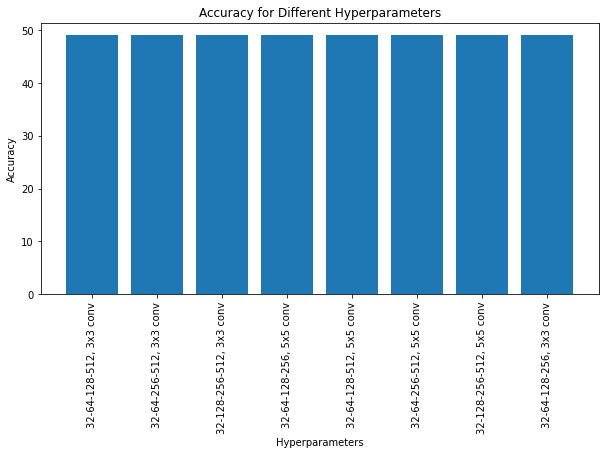

In [ ]:
import matplotlib.pyplot as plt

performance = [result["loss"] for result in results]
training_time = [result["time"] for result in results]
hyper_parameters = [experiment["label"] for experiment in experiments]
plt.figure(figsize=(10, 5))
plt.bar(hyper_parameters, performance)
plt.title("Accuracy for Different Hyperparameters")
plt.xlabel("Hyperparameters")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()


In [ ]:

plt.figure(figsize=(10, 5))
plt.bar(hyperparameters, training_time)
plt.title("Training Time for Different Hyperparameters")
plt.xlabel("Hyperparameters")
plt.ylabel("Training Time (s)")
plt.xticks(rotation=90)
plt.show()

NameError: ignored

<Figure size 720x360 with 0 Axes>